In [1]:
import anndata
from sklearn.manifold import TSNE
import plotnine as p
import scvi
import torch

/Users/val/miniforge3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
/Users/val/miniforge3/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
/Users/val/miniforge3/lib/python3.12/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!


In [3]:
model_naive = scvi.model.SCVI.load(
    '/Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/'
    'My Drive/Single cell data/AIDA Phase 1 Freeze 1/250312.model.naive'
)

INFO     File /Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/My Drive/Single cell        
         data/AIDA Phase 1 Freeze 1/250312.model.naive/model.pt already downloaded                                 


/Users/val/miniforge3/lib/python3.12/site-packages/scvi/model/base/_base_model.py:694: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.


In [7]:
model_naive.adata

AnnData object with n_obs × n_vars = 103811 × 36161
    obs: 'mapped_reference_assembly', 'alignment_software', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_uuid', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'donor_BMI_at_collection', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'suspension_percent_cell_viability', 'suspension_uuid', 'suspension_type', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'Ethnicity_Selfreported', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gene', 'TCRa_J_gene', 'TCRa_C_gene', 'TCRb_V_gene', 'TCRb_D_gene', 'TCRb_J_gene', 'TCRb_C_gene', 'TCR_Clonality', 'TCR_Clone_ID', 'BCR_VDJ_V_call', 'BCR_VDJ_D_call', 'BCR_VDJ_J_call', 'BCR_VDJ_

In [8]:
unique_count = model_naive.adata.obs['donor_id'].nunique()
print("Number of unique donor_id values:", unique_count)

Number of unique donor_id values: 50


/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 6 in image.
/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/250316.model.naive.donor_id.tsne.png


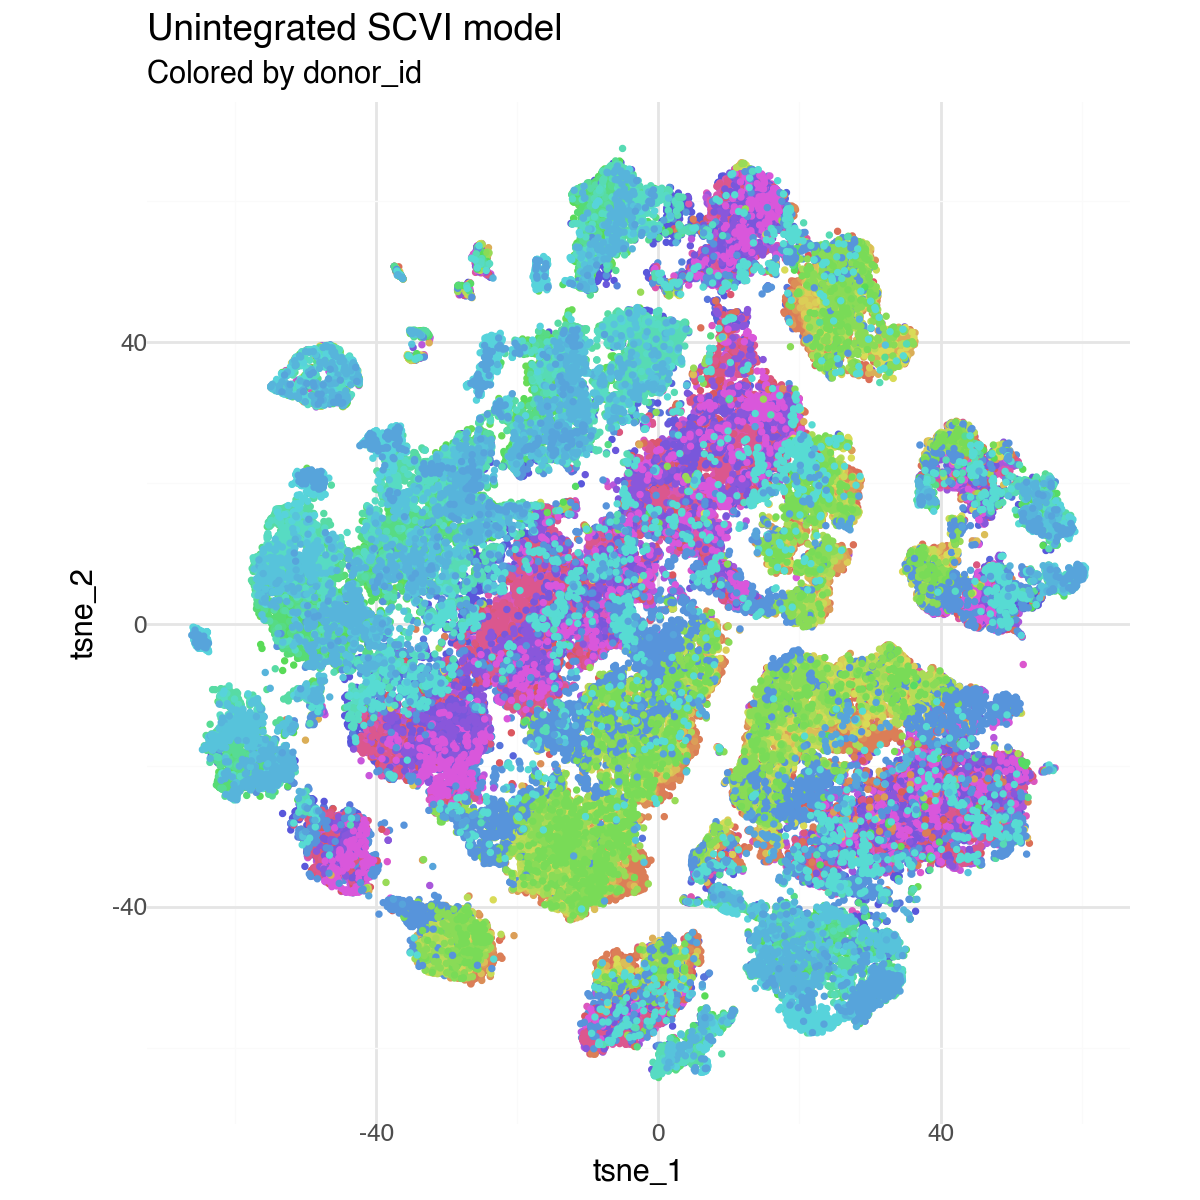

In [47]:
color_by = 'donor_id'
p_ = (
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', color = color_by), model_naive.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(title = 'Unintegrated SCVI model' ,subtitle = f'Colored by {color_by}')
)

p_.save(
    '/Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/'
    'My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/'
    '250316.model.naive.donor_id.tsne.png',
    dpi = 300
)

p_

/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 6 in image.
/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/250316.model.naive.cell_type.tsne.png


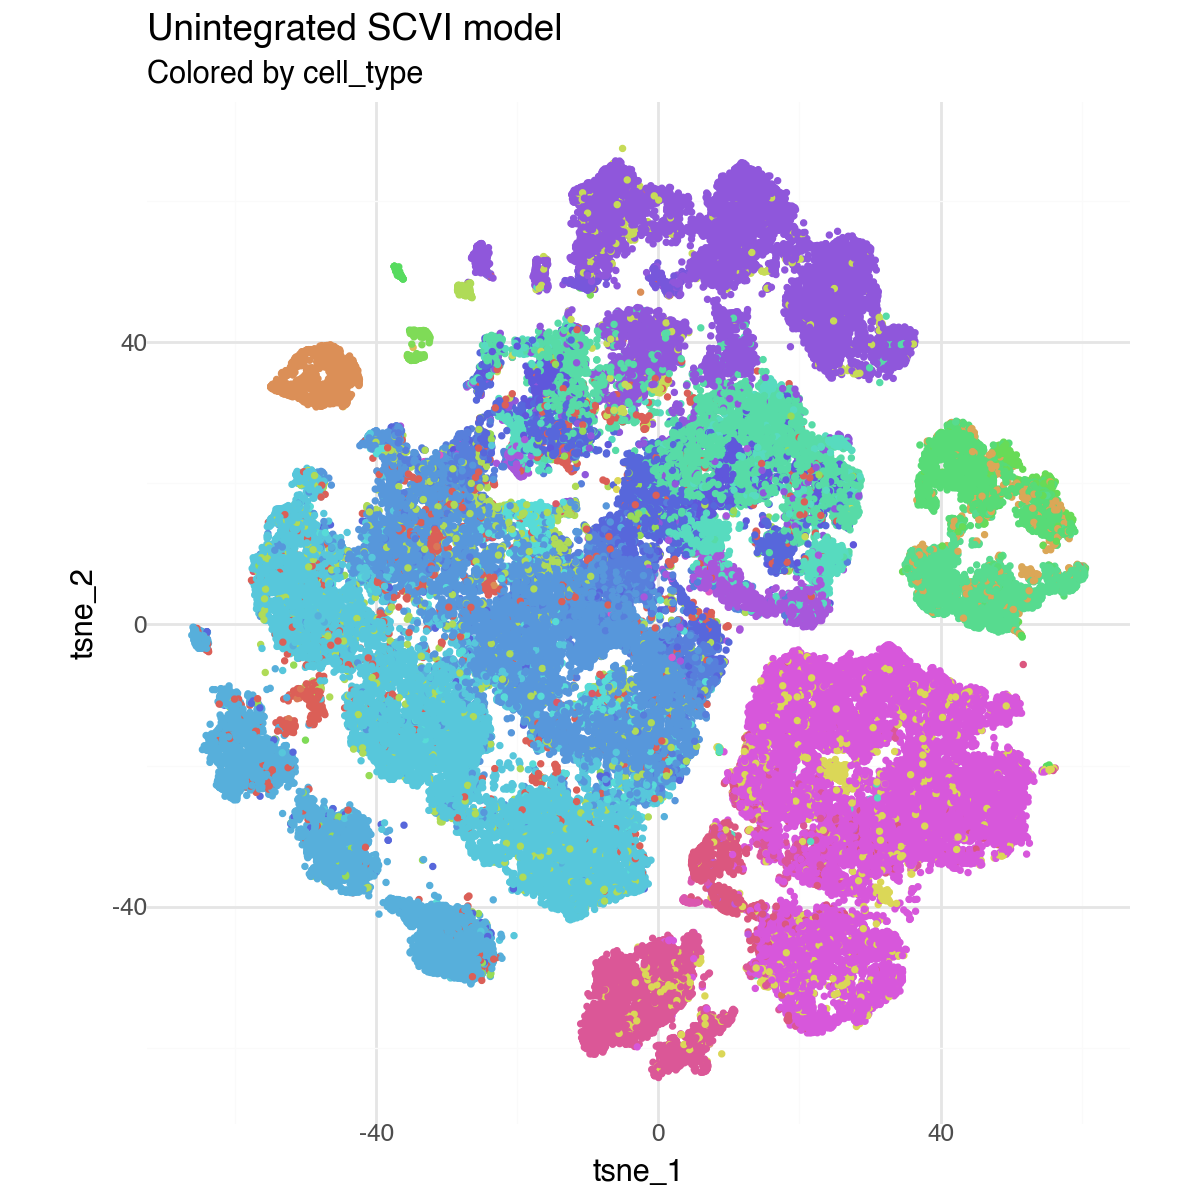

In [48]:
color_by = 'cell_type'
p_ = (
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', color = color_by), model_naive.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(title = 'Unintegrated SCVI model' ,subtitle = f'Colored by {color_by}')
)

p_.save(
    '/Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/'
    'My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/'
    '250316.model.naive.cell_type.tsne.png',
    dpi = 300
)

p_

In [49]:
model_integrated = scvi.model.SCVI.load(
    '/Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/'
    'My Drive/Single cell data/AIDA Phase 1 Freeze 1/250312.model.integrated'
)

INFO     File /Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/My Drive/Single cell        
         data/AIDA Phase 1 Freeze 1/250312.model.integrated/model.pt already downloaded                            


/Users/val/miniforge3/lib/python3.12/site-packages/scvi/model/base/_base_model.py:694: UserWarning: `accelerator` has been automatically set to `cpu` although 'mps' exists. If you wish to run on mps backend, use explicitly accelerator=='mps' in train function.In future releases it will become default for mps supported machines.


/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 6 in image.
/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/250316.model.integrated.donor_id.tsne.png


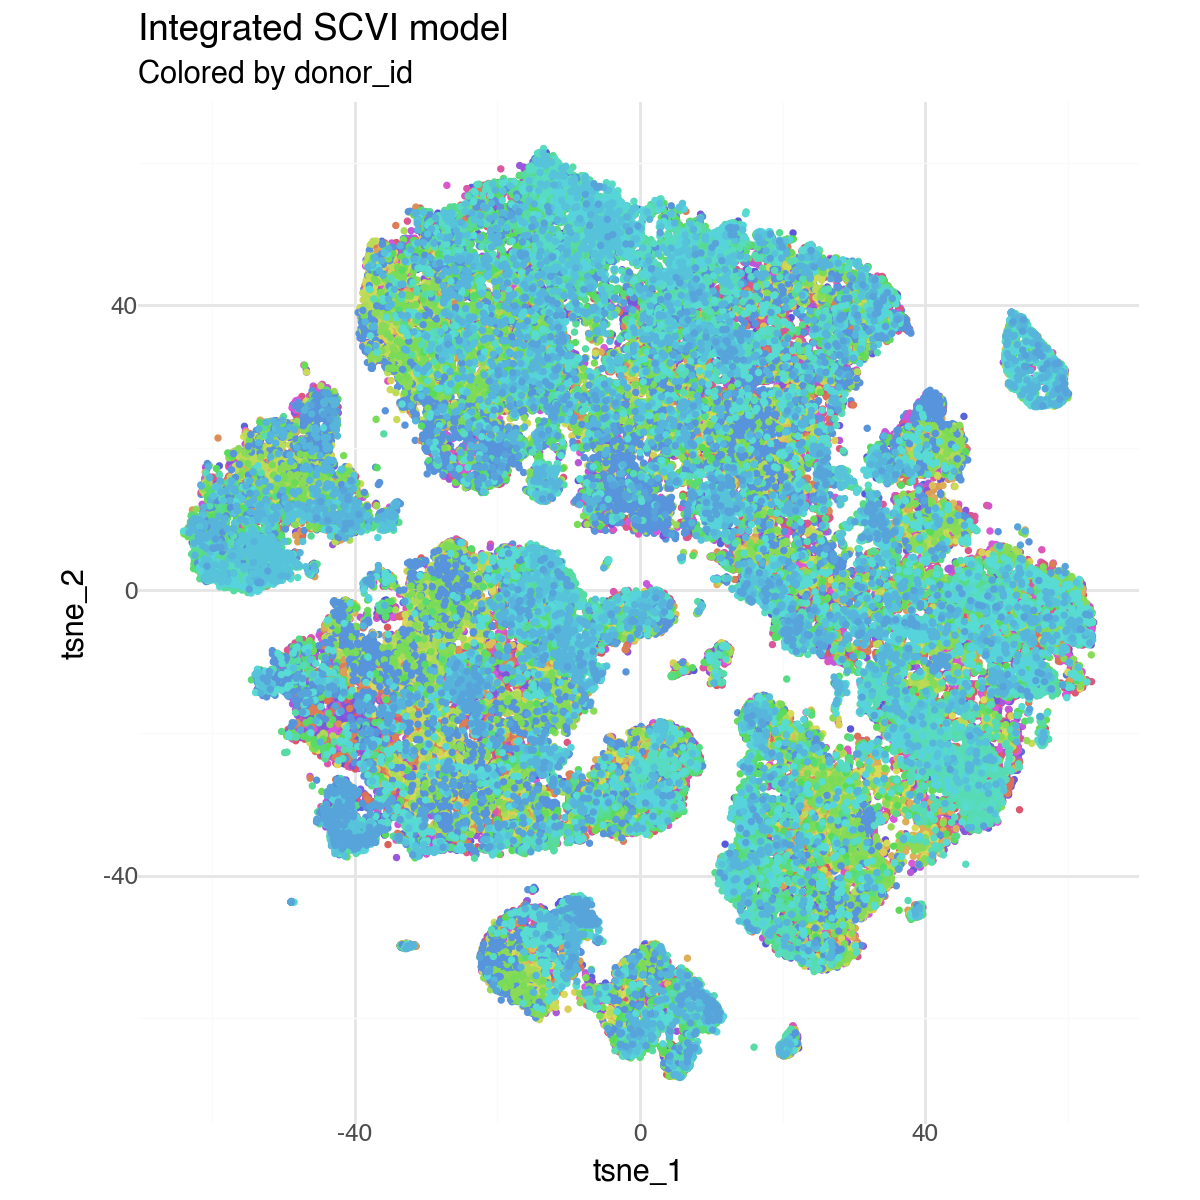

In [50]:
color_by = 'donor_id'
p_ = (
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', color = color_by), model_integrated.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(title = 'Integrated SCVI model' ,subtitle = f'Colored by {color_by}')
)

p_.save(
    '/Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/'
    'My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/'
    '250316.model.integrated.donor_id.tsne.png',
    dpi = 300
)

p_

/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6 x 6 in image.
/Users/val/miniforge3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: /Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/250316.model.integrated.cell_type.tsne.png


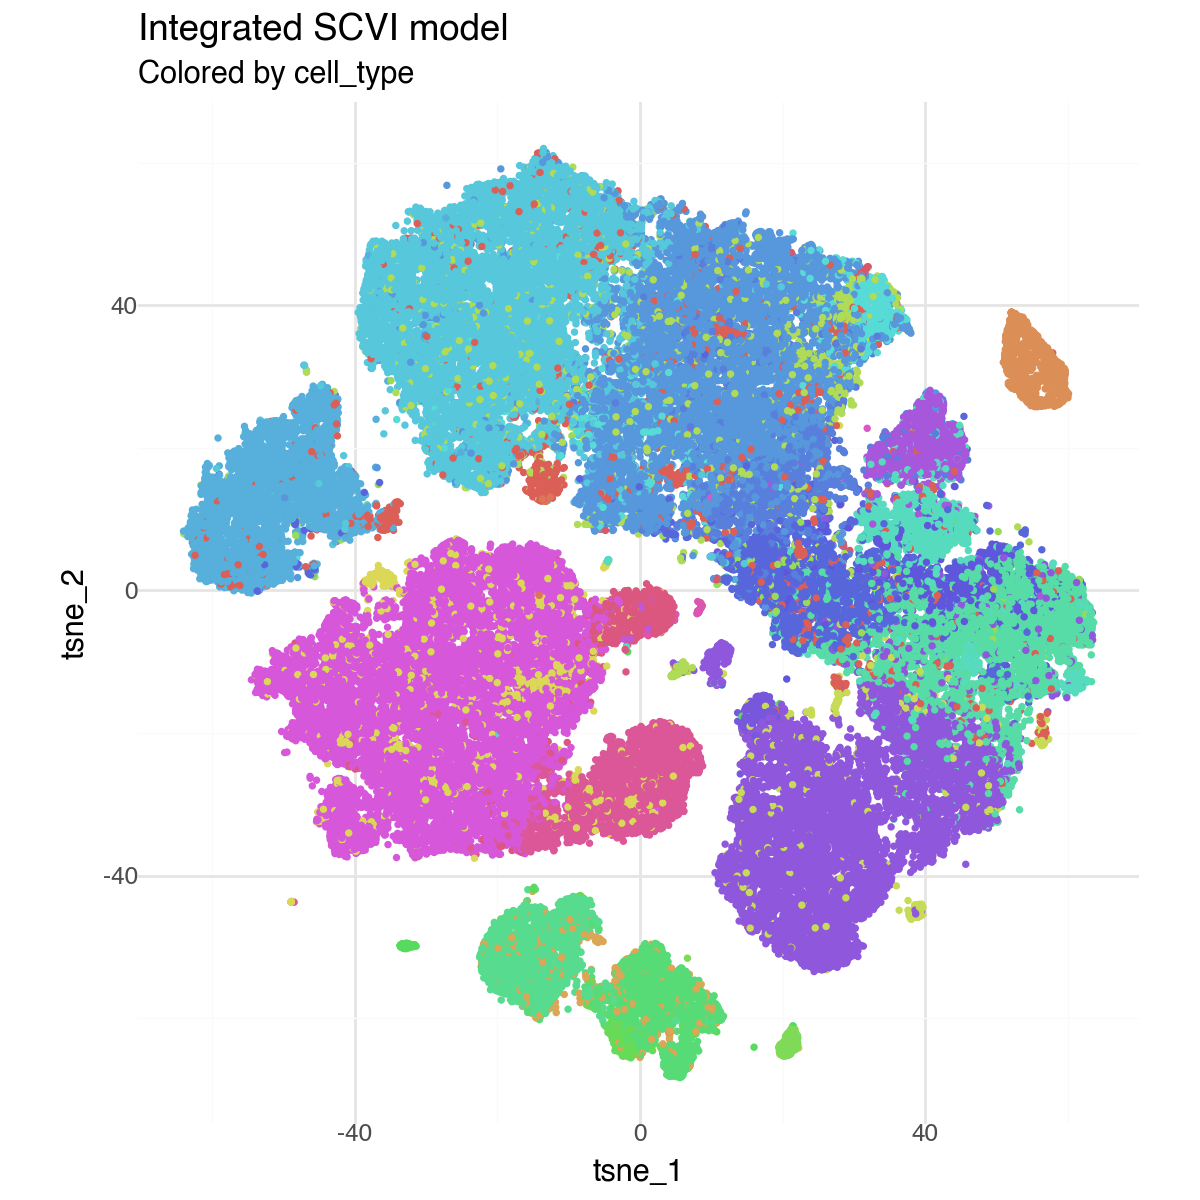

In [51]:
color_by = 'cell_type'
p_ = (
    p.ggplot(p.aes(x = 'tsne_1', y = 'tsne_2', color = color_by), model_integrated.adata.obs)
    + p.geom_point(shape = '.')
    + p.coord_equal()
    + p.theme_minimal()
    + p.theme(figure_size = (6, 6), legend_position = 'none')
    + p.labs(title = 'Integrated SCVI model' ,subtitle = f'Colored by {color_by}')
)

p_.save(
    '/Users/val/Library/CloudStorage/GoogleDrive-valentine.svensson@gmail.com/'
    'My Drive/Single cell data/AIDA Phase 1 Freeze 1/Figures/'
    '250316.model.integrated.cell_type.tsne.png',
    dpi = 300
)

p_